# 0710012 何權祐 HW4

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib3
import re
from io import StringIO

%matplotlib inline

# Data Generation

In [86]:
x = np.random.uniform(-1.5,1.0, 1000)
mu, sigma = 0, 0.5 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
y = 3*pow(x,exp=3) + 2*pow(x,exp=2)- 3*x + 1 + s
# print(y)

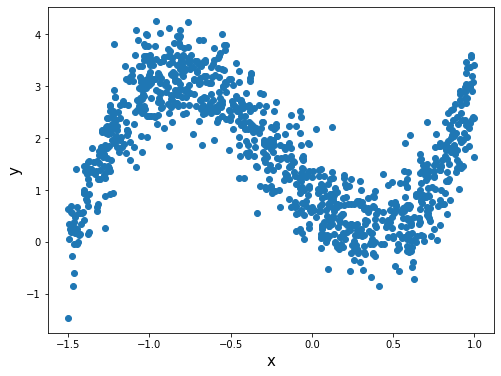

In [87]:
plt.figure(figsize = (8,6))
plt.scatter(x,y)
plt.xlabel('x', fontdict={'size':15})
plt.ylabel('y', fontdict={'size':15})
plt.show()

# Data Processing

In [88]:
from sklearn.preprocessing import PolynomialFeatures
feature=[0,0,0,0]
for i in range(4):
    feature[i] = x.reshape(1000,1)
    poly = PolynomialFeatures(i+1)
    feature[i] = poly.fit_transform(feature[i])
# print(feature[0])

# Model Consstruction

In [89]:
w = [0,0,0,0]
for i in range(4):
    w[i] = np.dot((np.dot(np.linalg.inv(np.dot(feature[i].T,feature[i])),feature[i].T)),y)
    # print(w[i])

# Result

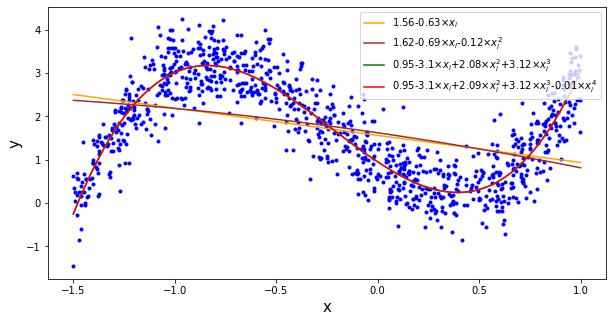

In [90]:
x_label = np.linspace(-1.5,1.0,100)
plt.figure(figsize = (10,5))
plt.plot(x, y, 'b.')

num=[0,0,0,0]
# K = 1
for i in range(1):
    if w[0][i+1]>0:
        num[i]=str('+'+str(round(w[0][i+1],2)))
    else:
        num[i]=str(round(w[0][i+1],2))
s=str(str(round(w[0][0],2))+num[0]+r'$\times x_i$')
a=plt.plot(x_label, w[0][1]*x_label + w[0][0],label=s,c='orange')

# K = 2
for i in range(2):
    if w[1][i+1]>0:
        num[i]=str('+'+str(round(w[1][i+1],2)))
    else:
        num[i]=str(round(w[1][i+1],2))
s=str(str(round(w[1][0],2))+num[0]+r'$\times x_i$'+num[1]+r'$\times x_i^2$')
b=plt.plot(x_label, w[1][2]*x_label**2 + w[1][1]*x_label + w[1][0],label=s,c='brown')

# K = 3
for i in range(3):
    if w[2][i+1]>0:
        num[i]=str('+'+str(round(w[2][i+1],2)))
    else:
        num[i]=str(round(w[2][i+1],2))
s=str(str(round(w[2][0],2))+num[0]+r'$\times x_i$'+num[1]+r'$\times x_i^2$'+num[2]+r'$\times x_i^3$')
c=plt.plot(x_label, w[2][3]*x_label**3 + w[2][2]*x_label**2 + w[2][1]*x_label + w[2][0],label=s,c='green')

# K = 4
for i in range(4):
    if w[3][i+1]>0:
        num[i]=str('+'+str(round(w[3][i+1],2)))
    else:
        num[i]=str(round(w[3][i+1],2))
s=str(str(round(w[3][0],2))+num[0]+r'$\times x_i$'+num[1]+r'$\times x_i^2$'+num[2]+r'$\times x_i^3$'+num[3]+r'$\times x_i^4$')
d=plt.plot(x_label, w[3][4]*x_label**4 + w[3][3]*x_label**3 + w[3][2]*x_label**2 + w[3][1]*x_label + w[3][0],label=s,c='red')

plt.legend(loc='upper right')
plt.xlabel('x', fontdict={'size':15})
plt.ylabel('y', fontdict={'size':15})
plt.show()